## Segment 1

In [1]:
# !conda install -c conda-forge praw
import pandas as pd
import requests
import praw

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime, timedelta
import pytz

In [2]:
import datetime
datetime.timedelta(days = 1)

datetime.timedelta(days=1)

In [3]:
stock_df = pd.read_csv('AMC.csv')
dates = pd.to_datetime(stock_df.Date).to_list()
cid = 'eQGw3HN2xAtPIBCXHgmOww'
csc = '95H3-NGa-GTU9qo8Jt5wduYgtAMtdw'
uagent = 'cjqsl516'
user = 'Top-Ad1803'
password = 'c5j1q6cjq'

In [4]:
# import praw
# from psaw import PushshiftAPI
# import time
# from tqdm import tqdm
# r = praw.Reddit(client_id= cid, \
#                  client_secret=csc, \
#                  user_agent=uagent, \
#                  username=user, \
#                  password=password)

# api = PushshiftAPI(r)
# res_list = []
# empty_records = []
# for dat in tqdm(dates):
#     try:
#         a = list(api.search_submissions(after=dat,
#                                         before = dat + timedelta(days = 1),
#                                     subreddit='finance',
#                                     limit=100))
#         day_info = [[aa.score, aa.title,datetime.fromtimestamp(int(aa.created_utc)).astimezone(ny).date()] for aa in a]
#         day_df = pd.DataFrame(day_info).sort_values(0, ascending = False).head(50)
#         res_list.append(day_df)
#     except:
#         empty_records.append(dat)

In [5]:
try:
    df = pd.read_excel('title.xlsx')
except:
    r = praw.Reddit(client_id= cid, \
                 client_secret=csc, \
                 user_agent=uagent, \
                 username=user, \
                 password=password)

    api = PushshiftAPI(r)
    res_list = []
    empty_records = []
    for dat in tqdm(dates):
        try:
            a = list(api.search_submissions(after=dat,
                                            before = dat + timedelta(days = 1),
                                        subreddit='worldnews',
                                        limit=100))
            day_info = [[aa.score, aa.title,datetime.fromtimestamp(int(aa.created_utc)).astimezone(ny).date()] for aa in a]
            day_df = pd.DataFrame(day_info).sort_values(0, ascending = False).head(50)
            res_list.append(day_df)
        except:
            empty_records.append(dat)
    df.columns = ['score', 'title', 'date']
    df.to_excel('title.xlsx', index=None)

In [6]:
df_copy = df.copy()

In [7]:
# df = df.groupby('date').head(10)

In [8]:
text_list = []
for i,g in df.groupby('date'):
    tx = ". ".join(g['title'])
    text_list.append([i, tx])

In [9]:
txt_df = pd.DataFrame(text_list)
txt_df.columns = ['date', 'text']

In [10]:
txt_df['date'] = pd.to_datetime(txt_df.date)

In [11]:
txt_df.head()

date                                               text
0 2016-06-23  Today The United Kingdom decides whether to re...
1 2016-06-24  British Pound drops nearly 5% in minutes follo...
2 2016-06-25  Brexit: Most Young voters where pro-EU but nev...
3 2016-06-28  Hong Kong democracy activists call for return ...
4 2016-06-29  Jehovah's Witnesses reportedly destroy 7000 ye...

In [12]:
stock_df['return'] = (stock_df['Adj Close'].pct_change() >= 0) * 1
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [13]:
merge_df = txt_df.merge(stock_df, how='inner', left_on='date', right_on='Date')

In [14]:
X = merge_df[['text', 'return']].copy()
y = X.pop('return')

In [15]:
X

text
0    Today The United Kingdom decides whether to re...
1    British Pound drops nearly 5% in minutes follo...
2    Hong Kong democracy activists call for return ...
3    Jehovah's Witnesses reportedly destroy 7000 ye...
4    Tibetan Director Hospitalized After Detention ...
..                                                 ...
969  CEOs urge world leaders to take bolder climate...
970  European Parliament overwhelmingly backs ban o...
971  Reports of Israeli strikes in Gaza, 1st under ...
972  Hong Kong national security law: Apple Daily c...
973  US chocolate companies cannot be sued for chil...

[974 rows x 1 columns]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
X_train

text
370  Mueller rejects Trump request to answer questi...
533  Israeli court releases footage of soldiers bea...
878  New Whale Species Discovered; Lends Proof Othe...
90   Chinese ships enter Japanese waters near Senka...
914  The United States announced talks for Thursday...
..                                                 ...
106  Irish leader doesn’t regret calling Trump “rac...
270  U.S. military's most advanced stealth fighters...
860  French children as young as 8 are being invest...
435  Justin Trudeau indicates he will not bend on k...
102  Russian children send 45 tons of New Year’s pr...

[652 rows x 1 columns]

In [19]:
vectorizer =  TfidfVectorizer()
vectorizer.fit(X_train['text'].to_list())
X_train = vectorizer.transform(X_train['text'].to_list())
X_test = vectorizer.transform(X_test['text'].to_list())

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
# print('Logic Regression accuracy: ', acc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.79      0.60       156
           1       0.53      0.22      0.31       166

    accuracy                           0.50       322
   macro avg       0.51      0.51      0.46       322
weighted avg       0.51      0.50      0.45       322



In [22]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)

Logic Regression accuracy:  0.4968944099378882


array([[123,  33],
       [129,  37]], dtype=int64)

# Segment 2

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
import pandas as pd
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
f = px.pie(stock_df['return'], names = 'return', title = ' Pie chart of different return type')
f.show()

## feature enginneering

In [26]:
remove_non_alphabets = lambda x: re.sub(r"[^a-zA-Z']", " ", x ) # rmove non alphabets
remove_tags = lambda x: re.sub('<[^<]+?>', '', x) # remove html tags
tokenize = lambda x: word_tokenize(str(x)) # tockenizer
remove_stop = lambda x: [w for w in x if (not w in stop_words) and  (w.find('\'')< 0) and  (len(w)> 1)]
ps = PorterStemmer()
stem = lambda w: [ps.stem(x) for x in w] # stemmer


ler = WordNetLemmatizer()
lemmatizer = lambda x: [ler.lemmatize(word) for word in x] # lemmatizer
def pre_process(df_in, col, label):
    df = df_in.copy()
    df[col] = df[col].apply(lambda x: x.lower()) # to loewer
    df[col] = df[col].apply(remove_tags)
    
    df[col] = df[col].apply(remove_non_alphabets)
    
    df[col] = df[col].apply(tokenize)
    df[col] = df[col].apply(remove_stop)
    df[col] = df[col].apply(stem)
    df[col] = df[col].apply(lemmatizer)
    df[col] = df[col].apply(lambda x: " ".join(x)) # merge cleaned list
    return df[[col, label]]

In [27]:
model_df = pre_process(merge_df, 'text', 'return')

In [28]:
model_df.head()

text  return
0  today unit kingdom decid whether remain europe...       1
1  british pound drop nearli minut follow strong ...       0
2  hong kong democraci activist call return briti...       1
3  jehovah wit reportedli destroy year old mexica...       1
4  tibetan director hospit detent chine polic isi...       1

## check frequent word in different return type.

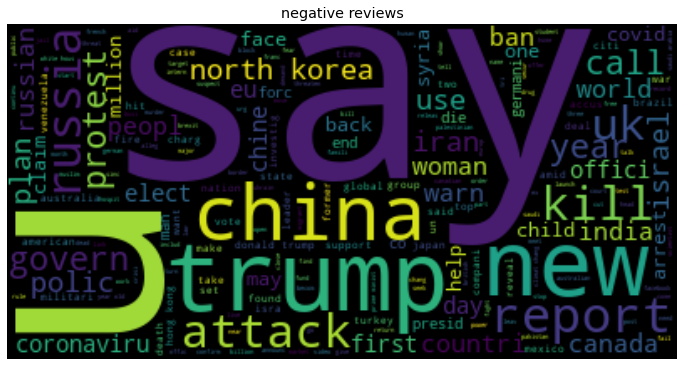

In [29]:
neg = model_df[model_df['return'] == 0].copy()
rev = " ".join(neg['text'].to_list())
wordcloud = WordCloud()
wordcloud = WordCloud().generate(rev)

plt.figure(figsize=(12, 12))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("negative reviews")
plt.show()

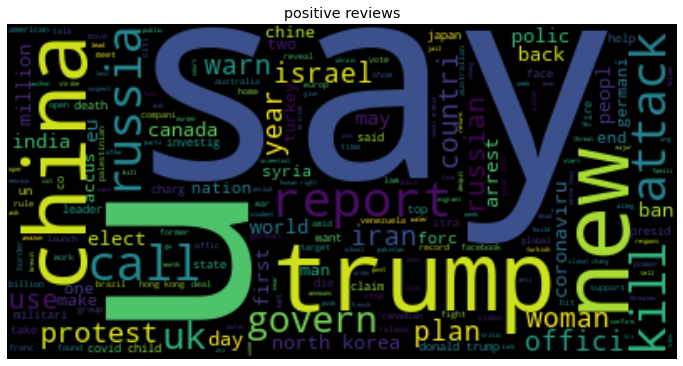

In [30]:
pos = model_df[model_df['return'] == 1].copy()
rev = " ".join(pos['text'].to_list())
wordcloud = WordCloud()
wordcloud = WordCloud().generate(rev)

plt.figure(figsize=(12, 12))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("positive reviews")
plt.show()

# train test split

In [31]:
X = model_df[['text', 'return']].copy()
y = X.pop('return')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [32]:
vectorizer =  TfidfVectorizer(min_df=0.07, max_features=30, ngram_range=(2,2), binary=False)


# vectorizer = CountVectorizer(stop_words="english", analyzer='word', binary=False,
#                             ngram_range=(1, 1), max_df=40, min_df=5, max_features=None) # vectorize
vectorizer.fit(X_train['text'].to_list())
X_train = vectorizer.transform(X_train['text'].to_list())
X_test = vectorizer.transform(X_test['text'].to_list())

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(C = 1, penalty='l2')
model = model.fit(X_train, y_train)
# Get test predictions
y_pred = model.predict(X_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
# print('Logic Regression accuracy: ', acc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.68      0.58       156
           1       0.55      0.37      0.45       166

    accuracy                           0.52       322
   macro avg       0.53      0.53      0.51       322
weighted avg       0.53      0.52      0.51       322



In [35]:
acc = accuracy_score(y_test, y_pred)
print('Logic Regression accuracy: ', acc)
confusion_matrix(y_test, y_pred)

Logic Regression accuracy:  0.5217391304347826


array([[106,  50],
       [104,  62]], dtype=int64)